<a href="https://colab.research.google.com/github/OjasZ/EDA/blob/main/EDA_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quantreg’, ‘car’, ‘rstatix’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Missing values: 0"
        
         Cutting Drowning Hanging Jumping Other poison Others Pesticide
  female      14       16     170       8           96      0       952
  male        15       10     261       7           50      1       816
        
         Poison unspec unspecified
  female            54          18
  male              53          30


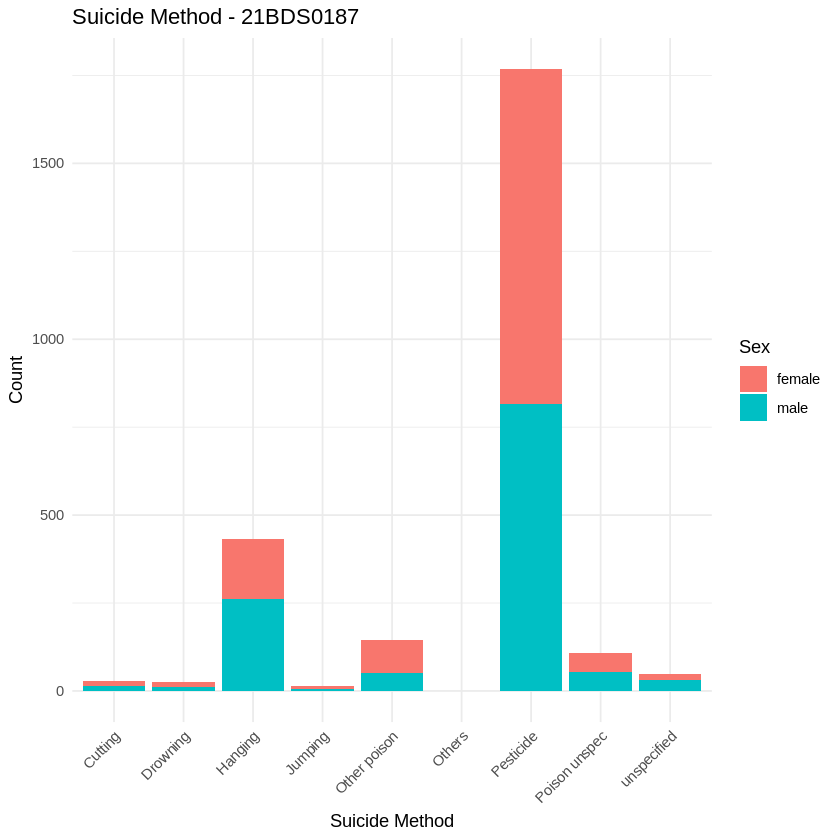

[1] "Pearson Correlation Coefficient: -0.00665106218696608"


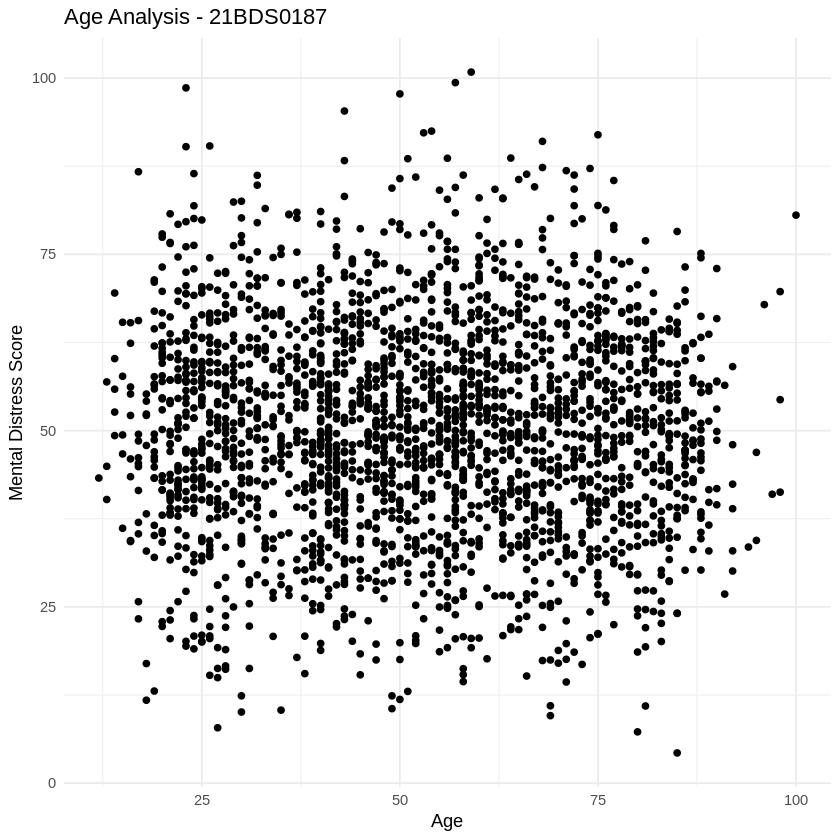

              Df Sum Sq Mean Sq F value Pr(>F)    
Education      4 430525  107631     480 <2e-16 ***
Residuals   2566 575378     224                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in library(GGally): there is no package called ‘GGally’


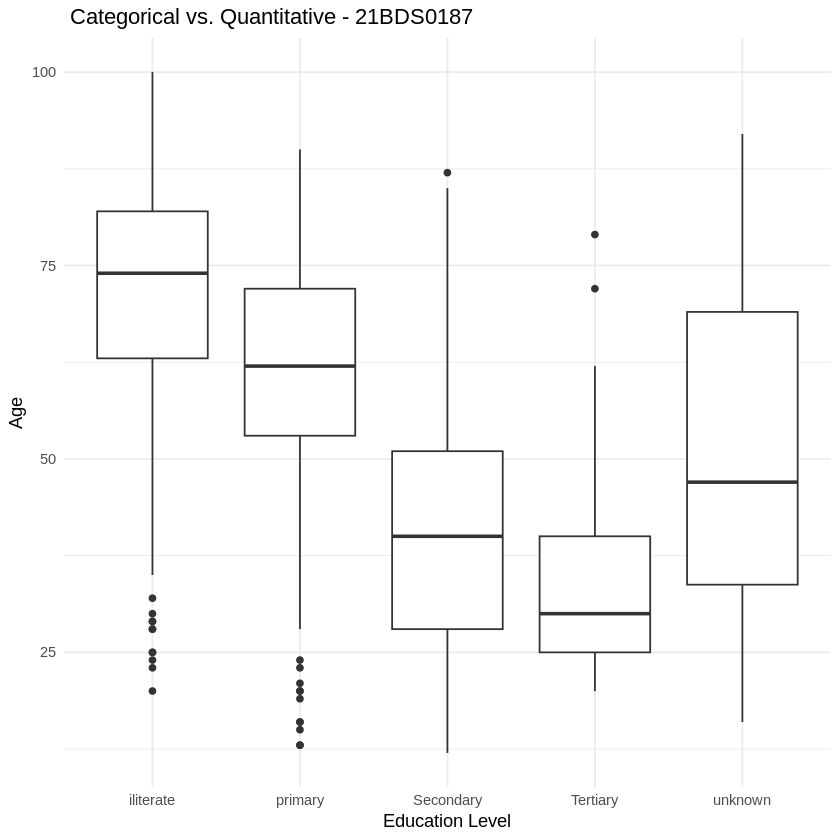

In [2]:
#Experiment 5: Bivariate and Multivariate Analysis

 install.packages("ggpubr")
# 1. Load and Prepare Data
# Install and load necessary packages
library(ggplot2)
library(dplyr)
library(ggpubr)

# Load the data
suicide_data <- read.csv("SuicideChina.csv")

# Data Cleaning and Transformation (important!)
# Convert relevant columns to factors (categorical variables)
suicide_data$Hospitalised <- as.factor(suicide_data$Hospitalised)
suicide_data$Died <- as.factor(suicide_data$Died)
suicide_data$Urban <- as.factor(suicide_data$Urban)
suicide_data$Sex <- as.factor(suicide_data$Sex)
suicide_data$Education <- as.factor(suicide_data$Education)
suicide_data$Occupation <- as.factor(suicide_data$Occupation)
suicide_data$method <- as.factor(suicide_data$method)

#Check for missing values
print(paste("Missing values:", sum(is.na(suicide_data)))) #Sum of all the missing values, will return 0 if there isn't
#if sum>0 do the following
#suicide_data <- na.omit(suicide_data) #Remove all the rows containing NA

# 2. Bivariate Analysis

# 2.1 Contingency Table and Categorical Plot (Gender vs. Method)
contingency_table <- table(suicide_data$Sex, suicide_data$method)
print(contingency_table)

# Stacked bar chart
ggplot(suicide_data, aes(x = method, fill = Sex)) +
  geom_bar(position = "stack") +
  labs(title = "Suicide Method - 21BDS0187", x = "Suicide Method", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels



# 2.2 Quantitative vs. Quantitative (Age vs. "Mental Distress")
# Create a dummy "Mental Distress" variable (since you don't have one)
set.seed(123)  # for reproducibility
suicide_data$Mental_Distress <- rnorm(nrow(suicide_data), mean = 50, sd = 15) # Replace 50 and 15 with reasonable values

# Scatter plot
ggplot(suicide_data, aes(x = Age, y = Mental_Distress)) +
  geom_point() +
  labs(title = "Age Analysis - 21BDS0187", x = "Age", y = "Mental Distress Score") +
  theme_minimal()

# Calculate Pearson's correlation coefficient
correlation <- cor(suicide_data$Age, suicide_data$Mental_Distress)
print(paste("Pearson Correlation Coefficient:", correlation))


# 2.3 Categorical vs. Quantitative (Boxplots of Age vs. Education)
ggplot(suicide_data, aes(x = Education, y = Age)) +
  geom_boxplot() +
  labs(title = " Categorical vs. Quantitative - 21BDS0187", x = "Education Level", y = "Age") +
  theme_minimal()

#Anova test
res.aov <- aov(Age ~ Education, data = suicide_data)
summary(res.aov)


# 3. Multivariate Analysis

# 3.1 Scatterplot Matrix (if you had more quantitative variables)
#install.packages("GGally")
library(GGally)

# Select numeric columns for the scatterplot matrix (Age and Mental_Distress)
numeric_data <- suicide_data[, c("Age", "Mental_Distress")]

# Create the scatterplot matrix
ggpairs(numeric_data, title = "Multivariate Analysis - 21BDS0187")




# 3.2 Conditional Scatterplots (Faceting by Sex)
ggplot(suicide_data, aes(x = Age, y = Mental_Distress)) +
  geom_point() +
  facet_wrap(~ Sex) +  # Create separate plots for each Sex
  labs(title = "Conditional Scatterplots - 21BDS0187", x = "Age", y = "Mental Distress") +
  theme_minimal()


